# Plottings

This notebook would be serving as a summarisation of how to plot neatly via Matplotlib.pyplot. As a self-taught DA learner, I understand how frustrated would be after reading online documentations but still don't know how to do it on real datasets. \
The following are some great cases. One case can be little complicated but later you can use it as a template to your own creations.

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Datasets are from Kaggle Competition: 
The goal is to use provided features to predict the target, meter_reading, which means each building's energy consumption.   

For convinience, I just used the training datasets, including the train and weather_train datasets.Additionally, building_metadata would be introduced to build the realtion between the above 2 training sets.
[data source](https://www.kaggle.com/c/ashrae-energy-prediction/data)

In [21]:
train = pd.read_csv('train.csv')
weather_train = pd.read_csv('weather_train.csv')

In [9]:
building = pd.read_csv('building_metadata.csv')

In [5]:
train.shape

(20216100, 4)

In [6]:
train.head()

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0


In [7]:
weather_train.shape

(139773, 9)

In [8]:
weather_train.head()

,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6


In [10]:
building.shape

(1449, 6)

In [11]:
building.head()

,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN


Little bit preprocessing: Merge 2 trainging sets based on building_id and site_id

In [22]:
train1 =train.merge(building,on='building_id',how='left')

In [23]:
train1.columns

Index(['building_id', 'meter', 'timestamp', 'meter_reading', 'site_id',
       'primary_use', 'square_feet', 'year_built', 'floor_count'],
      dtype='object')

In [24]:
train = train1.merge(weather_train, on=['site_id','timestamp'], how='left')

In [25]:
train.head()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


Have a bit overview of the final training data. For saving memory, it's necessary to assign proper data types to each column as well \
as some missing values imputations.
<span style='color:red'>But for plotting, I only focus on building_id, sit_id, meter, primary_use and our target-meter_reading.</span>

In [37]:
features =['building_id','site_id','meter','primary_use']

In [38]:
for feature in features:
    print(feature,'Total Unique Values: ',train[feature].nunique())

building_id Total Unique Values:  1449
site_id Total Unique Values:  16
meter Total Unique Values:  4
primary_use Total Unique Values:  16


In [ ]:
for feature in features.:
    print(feature,'Total Unique Values: ',train[feature].nunique())

In [28]:
train['meter'].value_counts()

0    12060910
1     4182440
2     2708713
3     1264037
Name: meter, dtype: int64

In [39]:
features.remove('building_id')

In [40]:
features

['site_id', 'meter', 'primary_use']

In [57]:
for feature in features:
    print(f'{feature} unique values: \n {train[feature].value_counts().index.sort_values().to_list()}')

site_id unique values: 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
meter unique values: 
 [0, 1, 2, 3]
primary_use unique values: 
 ['Education', 'Entertainment/public assembly', 'Food sales and service', 'Healthcare', 'Lodging/residential', 'Manufacturing/industrial', 'Office', 'Other', 'Parking', 'Public services', 'Religious worship', 'Retail', 'Services', 'Technology/science', 'Utility', 'Warehouse/storage']


In total, there are 1449 buildings from 16 sites. \
4 types of meters used for measing energy consumption, standing for :  {0: electricity, 1: chilledwater, 2: steam, hotwater: 3}. \
16 types of buildings based on their primary use purpose. 

## Plotting 1 : Present how many observations have been made for each primary use with an indicating line of each use's mean meter reading.
### <span style='color:red'>Keywords: Grouped charts (bar chart + line )</span> 
Firstly, we need to understand the bar chart: x woulds be primary-use names and y would be the number of observations with a certain primary-use.\
Then, we need to build a new axes, which should share the same x axis with the first chart but haveits own y axis.\
The color cold can be copied from [color codes](https://www.materialpalette.com/cyan/indigo)

In [115]:
primary_use = train['primary_use'].value_counts().index.to_list()

In [116]:
primary_use

['Education',
 'Office',
 'Entertainment/public assembly',
 'Lodging/residential',
 'Public services',
 'Healthcare',
 'Other',
 'Parking',
 'Manufacturing/industrial',
 'Food sales and service',
 'Retail',
 'Warehouse/storage',
 'Services',
 'Technology/science',
 'Utility',
 'Religious worship']

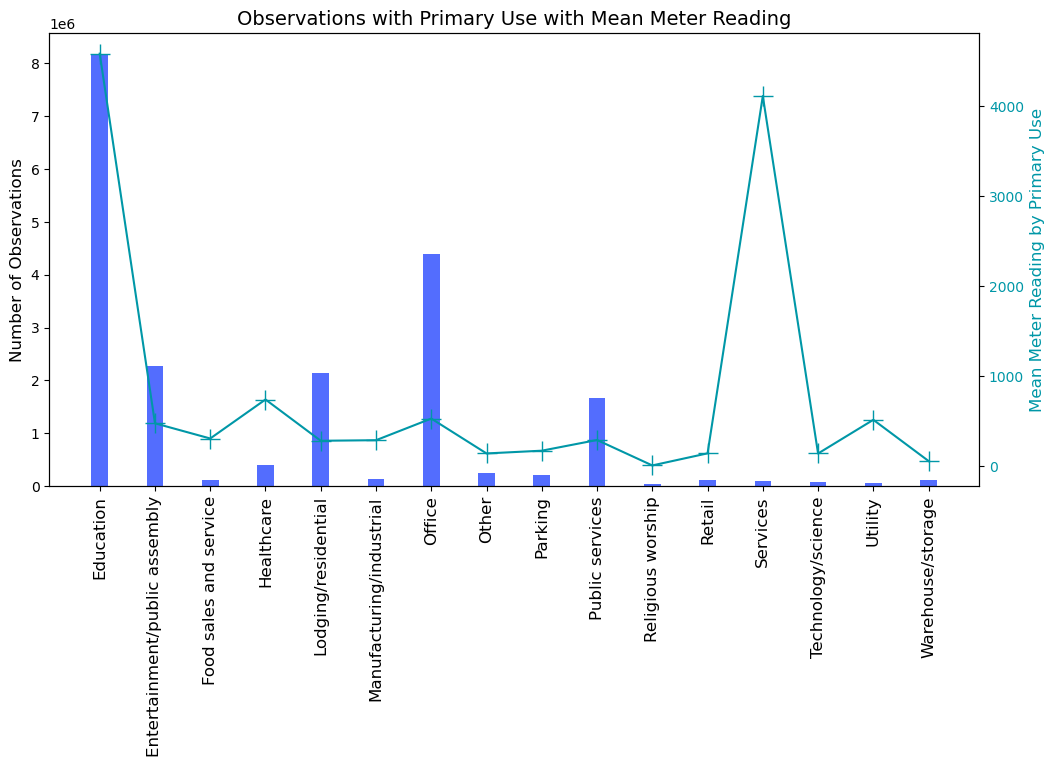

In [154]:
# Only one figure
rows=1
cols=1
fig,axes = plt.subplots(rows,cols, figsize=(12,6),dpi=100)

# Bar Chart
ind = np.arange(len(primary_use))  # x loacations  
height = train['primary_use'].value_counts().sort_index().values  # Use sort_index to make sure the order of primary use 
width = 0.3   # bar width

axes.bar(x=ind,height=height,width=width,color='#536DFE')
axes.set_ylabel('Number of Observations',fontsize=12)
axes.set_xticks(ind)  # Put the label in the middle of each bar
axes.set_xticklabels(train['primary_use'].value_counts().sort_index().index,fontsize=12,rotation=90)
axes.set_title('Observations with Primary Use with Mean Meter Reading',fontsize=14)


# Create a twin x axis and a new y axis to add anothe plot
axes2 = axes.twinx()
axes2.plot(ind,train[['primary_use','meter_reading']].groupby('primary_use')['meter_reading'].mean().sort_index().values,
           marker='+',markersize=15,color='#0097A7')
axes2.set_ylabel('Mean Meter Reading by Primary Use',fontsize=12,color='#0097A7')
axes2.tick_params(axis='y', labelcolor='#0097A7');


## Plotting 2 : TimeSeries Hourly/Daily Mean Meter Reading for 16 Sites
### <span style='color:red'>Keywords: subplots, loop</span> 
Firstly, before plotting, we should have a clear mind that what type of plotting we need to present the data.\
This requires us to think what kind of data (what are x and y) we need to get from the dataset.\
Training data is marked with 1 year timestamps. We want to explore how the mean meter reading change along the time.\
This requires us resample the data based on hour and day.


Secondly, before plotting, we also need to plan how many subplots we need to show on one figure.\
Figure can be taken as a a canvas. Axes can be taken as the place where you want to put each subplots inside.

Thirdly, think in details( all detailed properties), such as the labels, legends, color, marker for each subplot.

In [60]:
# Get our x and y 
train['meter_reading'].resample()

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


In [71]:
train =train.set_index('timestamp')
train.index = pd.to_datetime(train.index)

In [72]:
train.index

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 00:00:00',
               '2016-01-01 00:00:00', '2016-01-01 00:00:00',
               '2016-01-01 00:00:00', '2016-01-01 00:00:00',
               '2016-01-01 00:00:00', '2016-01-01 00:00:00',
               '2016-01-01 00:00:00', '2016-01-01 00:00:00',
               ...
               '2016-12-31 23:00:00', '2016-12-31 23:00:00',
               '2016-12-31 23:00:00', '2016-12-31 23:00:00',
               '2016-12-31 23:00:00', '2016-12-31 23:00:00',
               '2016-12-31 23:00:00', '2016-12-31 23:00:00',
               '2016-12-31 23:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=20216100, freq=None)

 Just try to plot a very simple plot only for site 0 in daily basis.

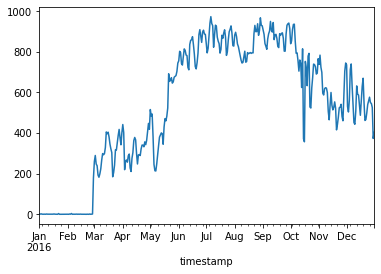

In [79]:
train[train['site_id']==0]['meter_reading'].resample(rule='D').mean().plot()

Now we know what it may look like for a single subplot. We need in total 16 subplots and each subplot has daily and hourly curves. 
We can place thoses 16 subplots on a figure, and make it wit 4,4 or 8,2 axes, which means how many in a row and a column.
Then we will write a loop to plot just as what we have done for site 0 daily plotting above.
Lastly, we will set all properties in the end.

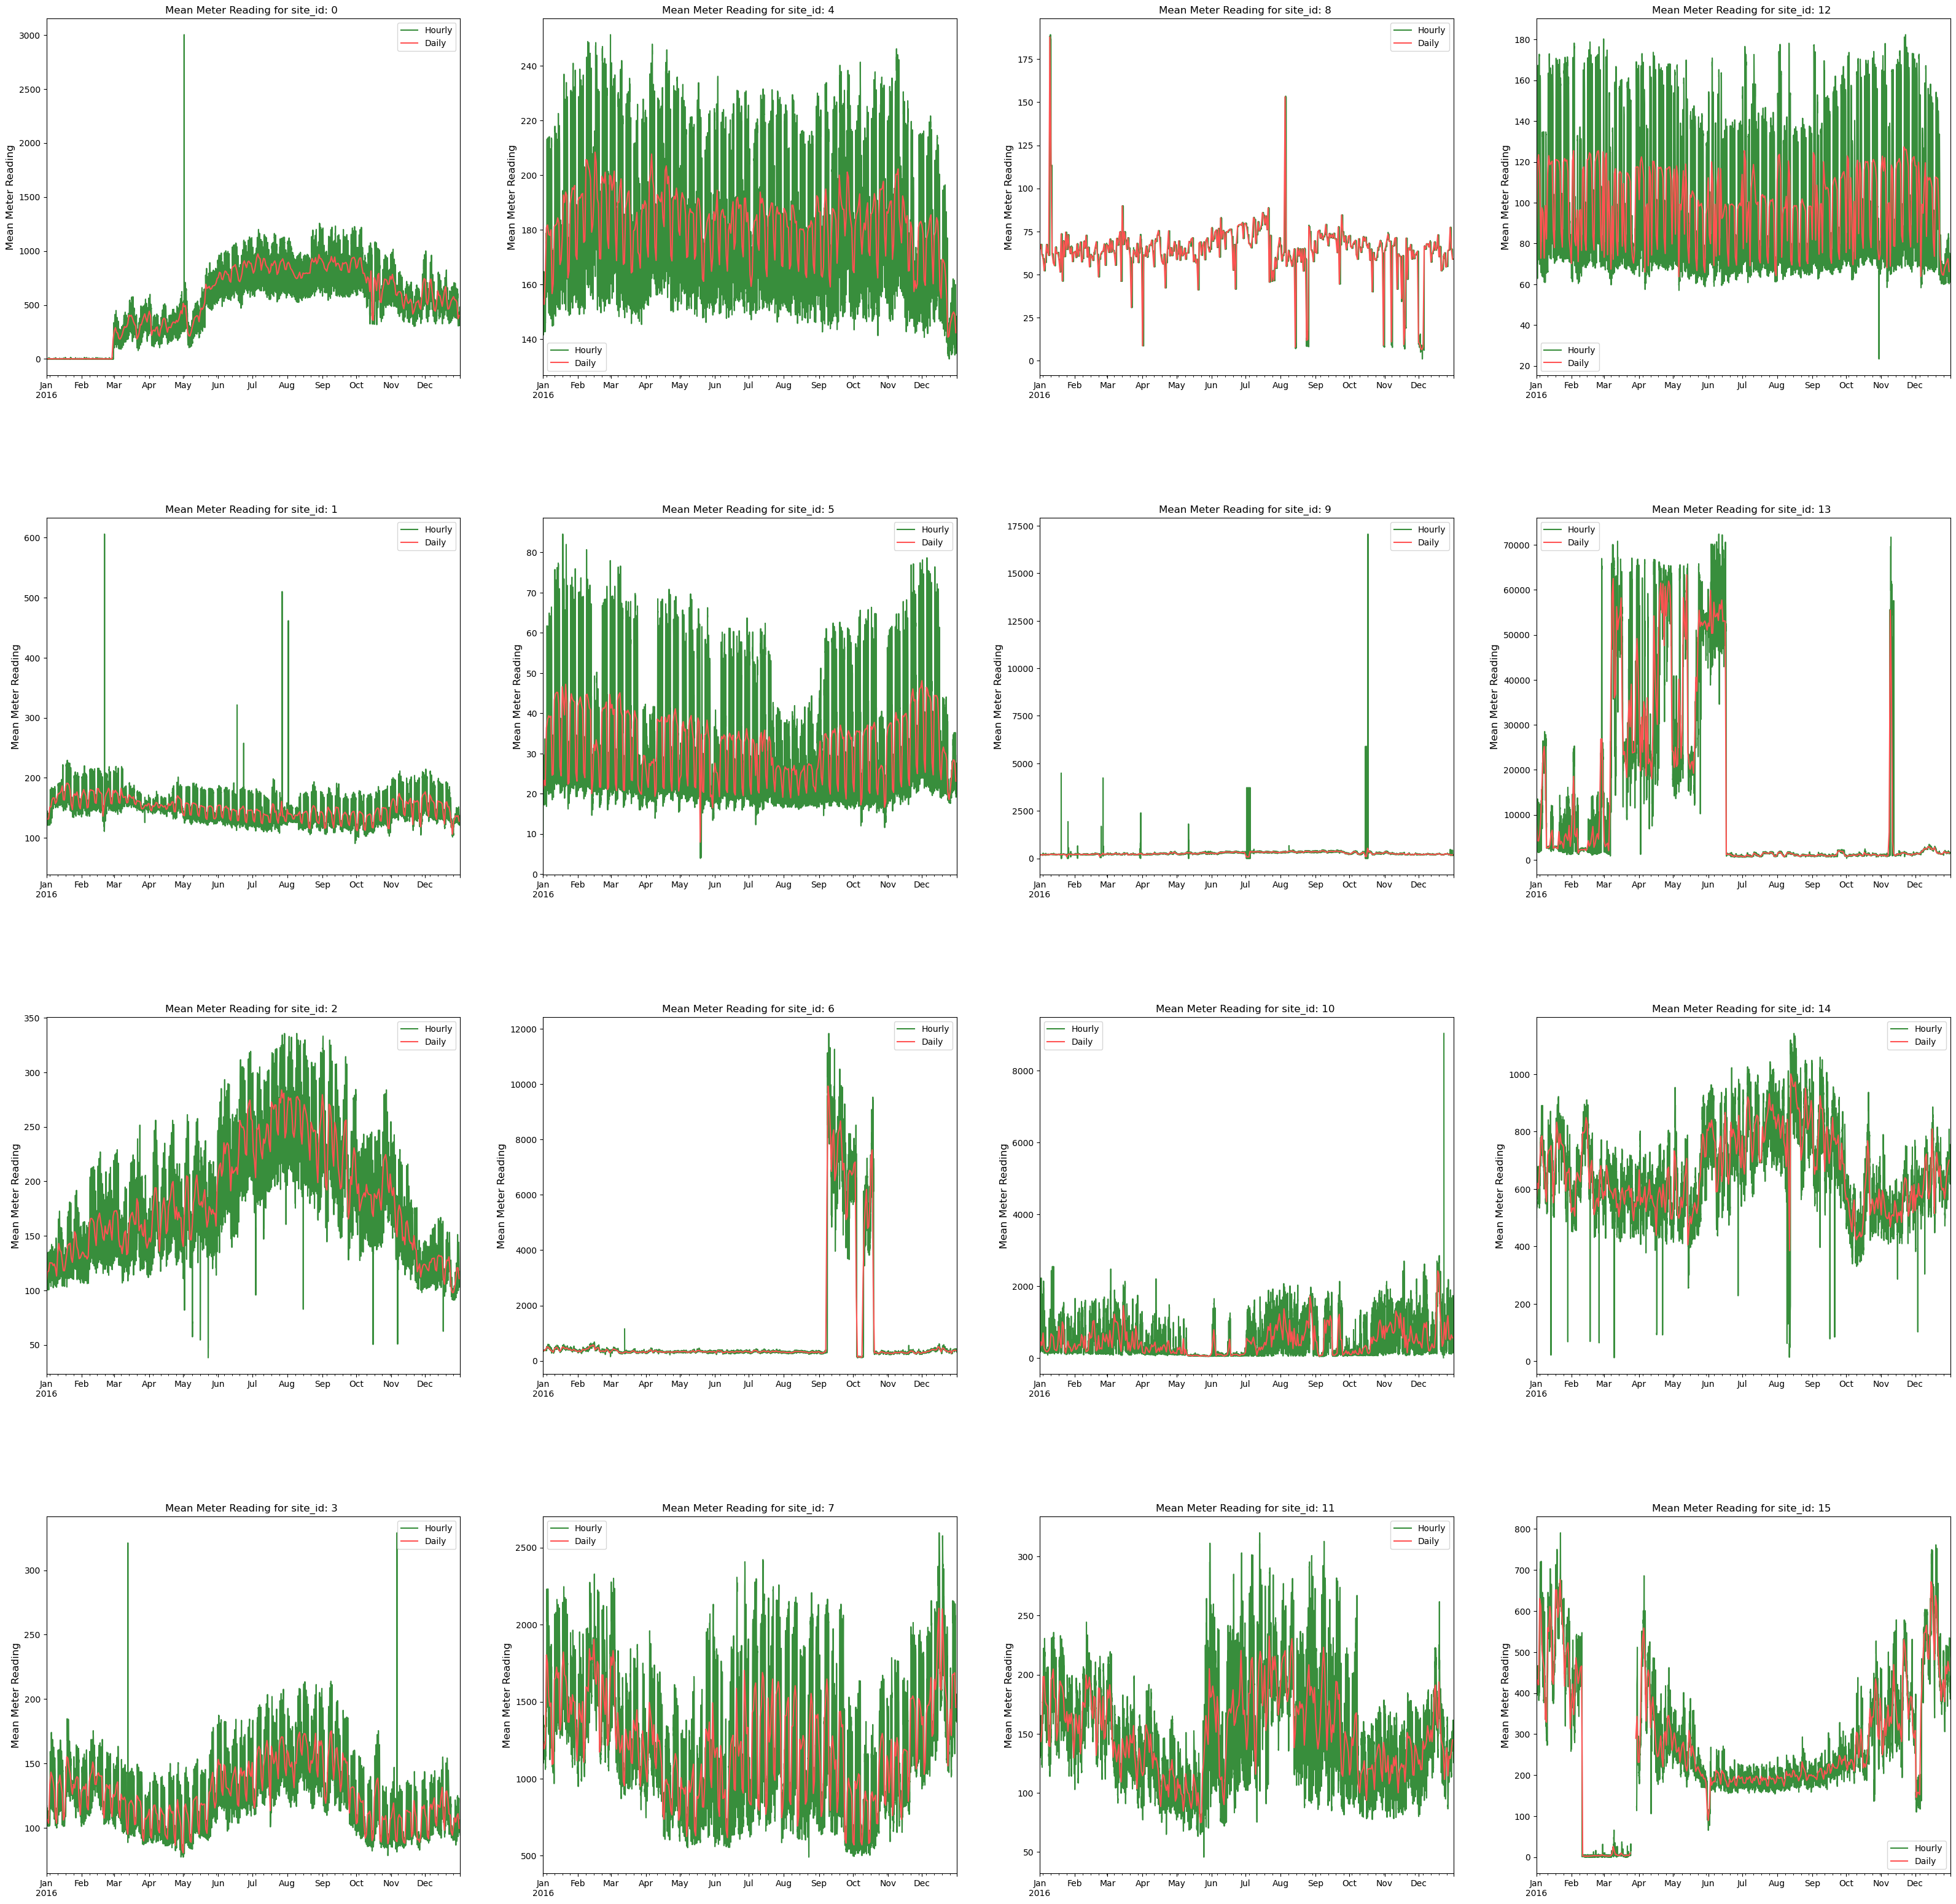

In [91]:
rows=4
cols=4
figure,axes = plt.subplots(rows,cols,figsize=(40,40),dpi=100)  # Set the whole figure size and subplots numbers
site_ids = train['site_id'].value_counts().index.sort_values().to_list()  # save all site ids in a list
for i in range(len(site_ids)):
    train[train['site_id']==i]['meter_reading'].resample(rule='H').mean().plot(ax=axes[i%rows][i//rows],label='Hourly',color='#388E3C').set_ylabel('Mean Meter Reading',fontsize=12)
    train[train['site_id']==i]['meter_reading'].resample(rule='D').mean().plot(ax=axes[i%rows][i//rows],label='Daily',color='#FF5252').set_xlabel('')
    axes[i%rows][i//rows].legend()
    axes[i%rows][i//rows].set_title(f'Mean Meter Reading for site_id: {i} ')
    plt.subplots_adjust(hspace=0.4)